# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [86]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [87]:
from PIL import Image
import keras.utils as image
import numpy as np
import pandas as pd

import cv2
#from scipy.misc.pilutil import imread ## older version

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [88]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [89]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [90]:
img_path = "webcam_test_img_2.png"

## If using colab convert image into (244,244) else use the code below
'''
if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

'''

'\nif save_webcam_image(img_path) is False:\n    # Webcam not active, use the Dog Image\n    img_path = "rocking_chair.jpg"\n    print("Using the Test Rocking Chair Image: {}".format(img_path))\n\n'

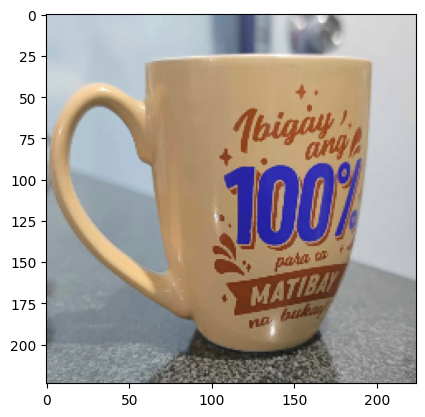

In [91]:
plt.imshow(cv2.imread(img_path))

Use VGG-16 pre-trained model

In [92]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets

In [93]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [94]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 1s 799ms/step


,Predicted Class,Name,Probability
0,n03063599,coffee_mug,0.871714
1,n07930864,cup,0.116019
2,n04579145,whiskey_jug,0.004331
3,n07920052,espresso,0.003872
4,n03733805,measuring_cup,0.001362
5,n03950228,pitcher,0.000865
6,n04560804,water_jug,0.000418
7,n07932039,eggnog,0.000273
8,n04398044,teapot,0.000249
9,n03063689,coffeepot,0.000188


Interpret the result of prediction using VGG16 model

- - The model predicted that the image is 87% coffee mug and 13% other objects, one class is really far from the image which is the eggnog. Maybe it was because of the color of the mug? or the shape?

#type your answer here

Use Resnet50 pretrained model

In [95]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_27[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

Predict the result

In [96]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 2s 2s/step


,Predicted Class,Name,Probability
0,n03063599,coffee_mug,0.831498
1,n07930864,cup,0.139815
2,n07920052,espresso,0.005257
3,n04579145,whiskey_jug,0.004055
4,n03950228,pitcher,0.003689
5,n03063689,coffeepot,0.003022
6,n04560804,water_jug,0.002357
7,n02823750,beer_glass,0.002005
8,n04398044,teapot,0.001570
9,n04131690,saltshaker,0.001365


Interpret the result using RESNET50 pretrained model

- The model predicted that the image is 83% coffee mug and 17% other objects, mostly related to drinking objects.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

**Use Xception model**

In [97]:
#### type your code here

from keras.applications import xception

xception_model = xception.Xception(weights='imagenet')
xception_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_28 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_28[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

In [98]:
predict_image(xception_model, img_path, xception.preprocess_input, xception.decode_predictions, (299, 299))

1/1 [==============================] - 2s 2s/step


,Predicted Class,Name,Probability
0,n03063599,coffee_mug,0.377328
1,n07920052,espresso,0.057973
2,n07930864,cup,0.046482
3,n04579145,whiskey_jug,0.010338
4,n02823750,beer_glass,0.006059
5,n03843555,oil_filter,0.005140
6,n03733805,measuring_cup,0.004626
7,n03063689,coffeepot,0.004085
8,n07932039,eggnog,0.003315
9,n03297495,espresso_maker,0.003198


**Using NasNetLarge model**

In [99]:
from keras.applications import nasnet

nasnetlarge_model = nasnet.NASNetLarge(weights='imagenet')
nasnetlarge_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_29 (InputLayer)       [(None, 331, 331, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 165, 165, 96)         2592      ['input_29[0][0]']            
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 165, 165, 96)         384       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_260 (Activation  (None, 165, 165, 96)         0         ['stem_bn1[0][0]']       

In [100]:
predict_image(nasnetlarge_model, img_path, nasnet.preprocess_input, nasnet.decode_predictions, (331,331))

1/1 [==============================] - 18s 18s/step


,Predicted Class,Name,Probability
0,n03063599,coffee_mug,0.817806
1,n07930864,cup,0.014090
2,n07920052,espresso,0.007922
3,n03063689,coffeepot,0.003753
4,n03297495,espresso_maker,0.002035
5,n07932039,eggnog,0.001920
6,n04398044,teapot,0.001700
7,n04579145,whiskey_jug,0.001333
8,n04560804,water_jug,0.001164
9,n04263257,soup_bowl,0.000946


**Using VGG19 model**

In [101]:
from keras.applications import vgg19

vgg19_model = vgg19.VGG19(weights='imagenet')
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [102]:
predict_image(vgg19_model, img_path, vgg19.preprocess_input, vgg19.decode_predictions)

1/1 [==============================] - 2s 2s/step


,Predicted Class,Name,Probability
0,n03063599,coffee_mug,0.926572
1,n07930864,cup,0.067969
2,n04579145,whiskey_jug,0.002075
3,n07920052,espresso,0.001347
4,n04560804,water_jug,0.000439
5,n03733805,measuring_cup,0.000377
6,n07932039,eggnog,0.000300
7,n03950228,pitcher,0.000281
8,n02823750,beer_glass,0.000204
9,n03063689,coffeepot,0.000115


| Xception | NasNetLarge | VGG19 |
| :-: | :-: | :-: |
| 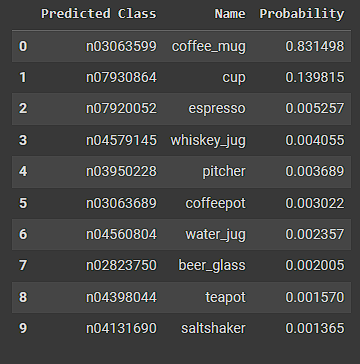 | 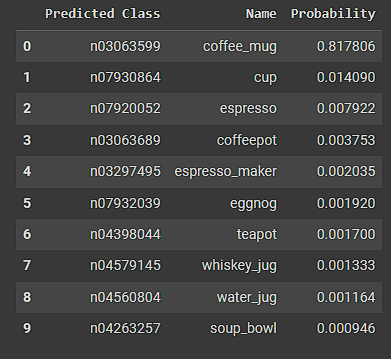 | 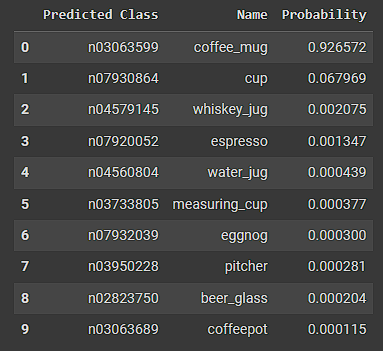 |

- Based on the results the `VGG19` out performs the other models, this may be becasuse of the network structure that VGG19 has, it has the most parameters among the two models, having more nodes and layers.

#### Conclusion

***During the activity I was able to learn about pre-built and pre-trained models available in keras. There are other pre-trained models that require a bigger input dimension, and bigger parameters, it can be changed in within the predict_image() function.***